# PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE
## MAGISTER EN ESTADÍSTICA
### EPG3341 - SEMINARIO DE ESTADÍSTICA - PYTHON
### Tarea 2

Nombre: Santiago Urquizo

Fecha: 30 de junio de 2022

In [222]:
# Librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import cluster as cl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering as agc
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from plotly.offline import download_plotlyjs, plot, iplot
from plotly.graph_objs import *
from sklearn.model_selection import train_test_split

In [13]:
# dirección
link = ("C:/Users/santi/Documents/SANTIAGO/Tarea 2 - Python/")

## EJERCICIO 2
El objetivo de este problema es generar una nueva clasificación de vinos guiada por criterios químicos y algunos otros físicos

In [108]:
# IMPORTACIÓN DE DATOS
vino = pd.read_csv(link + "wine.csv")
vino.head()
vino.info(verbose=True, show_counts=True) # no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### 2.1 Clusterización utilizando k-means

In [36]:
scaler = StandardScaler().fit(vino)
vino2 = scaler.transform(vino)

In [37]:
def get_SCW(k):
    kme = cl.KMeans(n_clusters = k)
    kme.fit(vino2) 
    return kme.inertia_

In [55]:
W = []
for i in range(1, 20):
    W.append(get_SCW(i))

C:\Users\santi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
lifts = np.array(W)/W[0]

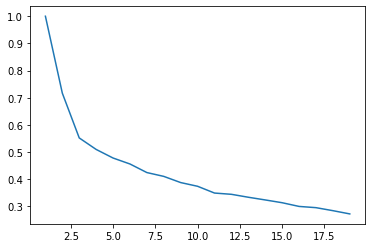

In [51]:
plt.plot(range(1,20), lifts)
plt.show()

Mediante el método del baston determinamos que el número adecuado de clusters es **3** ya que es aquel para la cual la disminución del Lift con cluster adicional pasa a ser marginal 

In [58]:
# Ajuste modelo Kmeans
kme = cl.KMeans(n_clusters = 3)
kme.fit(vino2) 
Clustered = vino
Clustered['Cluster'] = kme.predict(vino2)

In [ ]:
medias = Clustered.groupby(['Cluster']).count()
medias

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,62,62,62,62,62,62,62,62,62,62,62,62,62
1,51,51,51,51,51,51,51,51,51,51,51,51,51
2,65,65,65,65,65,65,65,65,65,65,65,65,65


### 2.2 Clusterización utilizando el algoritmo DBSCAN

Text(0, 0.5, 'Distance')

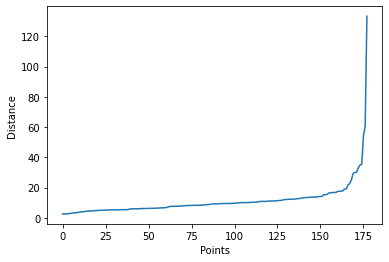

In [73]:
k = 3
data_nn = Clustered.copy()

nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(data_nn)
distances, indices = neighbors.kneighbors(data_nn)
distances = np.sort(distances, axis=0)

distances = distances[:,1]

i = np.arange(len(distances))

sns.lineplot(
    x = i, 
    y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

Para obtener los hiperparametros se utilizó el metodo de graficar las distancias y el punto de quiebre usando la logica de k-vecinos más cercans
Los parametros seleccionados fueron los siguientes:

Valor óptimo de epsilon: 30

Numero mínimo de puntos: 160

In [137]:
# Ajuste modelo DBSCAN
db = cl.DBSCAN(eps=30, min_samples=160)
ft1 = db.fit_predict(vino2) 
Clustered2 = vino
Clustered2['Cluster'] = db.fit_predict(vino2)

In [91]:
medias2 = Clustered2.groupby(['Cluster']).count()
medias2

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,178,178,178,178,178,178,178,178,178,178,178,178,178


### 2.3 Clusterización utilizando clustering jerárquico

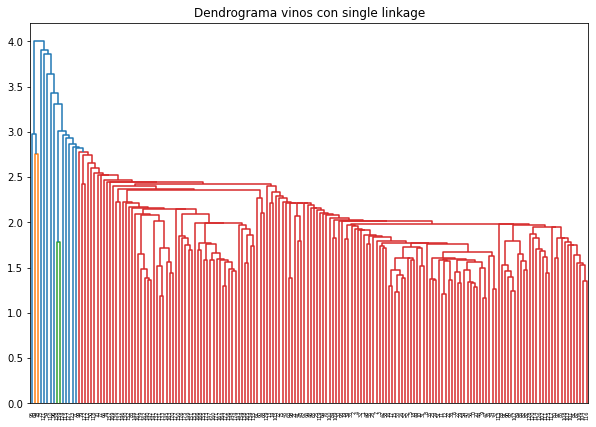

In [95]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma vinos con single linkage")  
dend = shc.dendrogram(shc.linkage(vino2, method='single'))

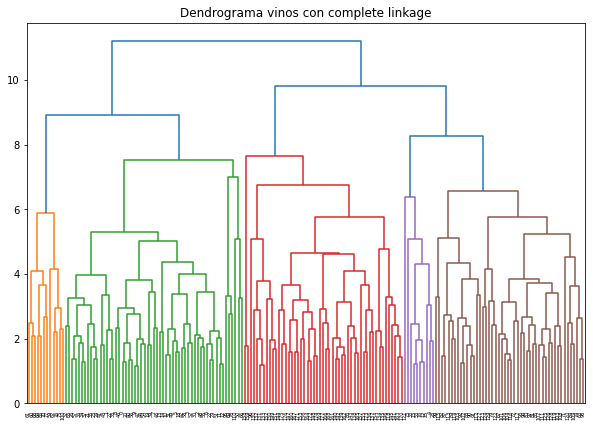

In [96]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma vinos con complete linkage")  
dend = shc.dendrogram(shc.linkage(vino2, method='complete'))

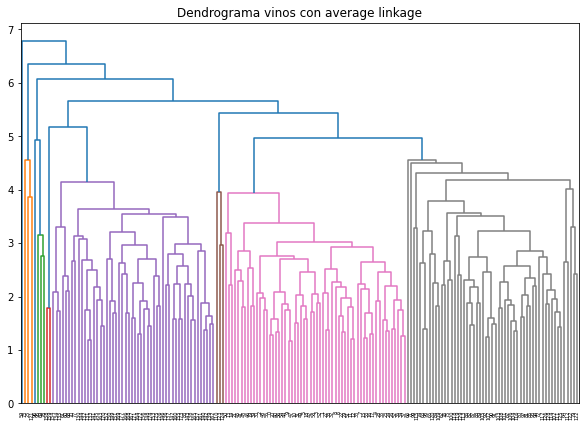

In [98]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma vinos con average linkage")  
dend = shc.dendrogram(shc.linkage(vino2, method='average'))

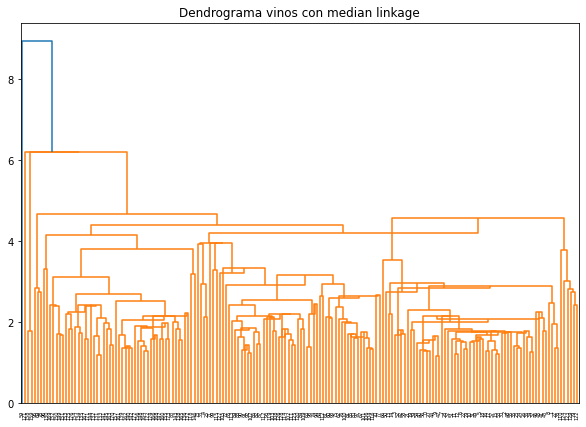

In [99]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma vinos con median linkage")  
dend = shc.dendrogram(shc.linkage(vino2, method='median'))

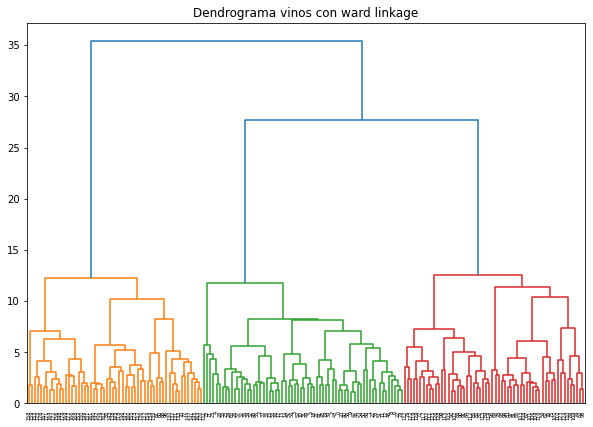

In [100]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma vinos con ward linkage")  
dend = shc.dendrogram(shc.linkage(vino2, method='ward'))

Mediante dendogramas y probando varios Linkages (single, complete, centroid, average, median y Ward) encontramos que el más adecuado para calcular distancias entre los clusters de vinos resultó ser el Linkage **Ward**.

Se decicio utilizar cuatro conglomerados para agrupar

In [148]:
#Ajuste utilizando un clustering jerárquico
cluster = agc(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')  
preds3 = cluster.fit_predict(vino2)

In [149]:
Clustered3 = vino
Clustered3['Cluster'] = preds3

In [150]:
medias3 = Clustered3.groupby(['Cluster']).count()
medias3

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,56,56,56,56,56,56,56,56,56,56,56,56,56
1,30,30,30,30,30,30,30,30,30,30,30,30,30
2,64,64,64,64,64,64,64,64,64,64,64,64,64
3,28,28,28,28,28,28,28,28,28,28,28,28,28


### 2.4 Mejor cluster utilizando indicador Davies-Bouldin y el Silouette width 

In [154]:
## Candidato 1: Kmeans
km_labels = kme.labels_

# Indicador Davies-Bouldin
km_dbs = davies_bouldin_score(vino.values, km_labels)
print("Davies Bouldin score:",km_dbs)

# Indicador Silouette width 
silhouette_avg = silhouette_score(vino.values, km_labels)
print("Silouette width:",silhouette_avg)

Davies Bouldin score: 1.5206296657311478
Silouette width: 0.1943456886645409


In [155]:
## Candidato 2: DBSCAN

# Indicador Davies-Bouldin
km_dbs = davies_bouldin_score(vino.values, Clustered2['Cluster'].values)
print("Davies Bouldin score:",km_dbs)

# Indicador Silouette width 
silhouette_avg = silhouette_score(vino.values, Clustered2['Cluster'].values)
print("Silouette width:",silhouette_avg)

Davies Bouldin score: 2.292085515967015
Silouette width: 0.10423806083541756


In [156]:
## Candidato 3: Clustering jerárquico

# Indicador Davies-Bouldin
km_dbs = davies_bouldin_score(vino.values, Clustered3['Cluster'].values)
print("Davies Bouldin score:",km_dbs)

# Indicador Silouette width 
silhouette_avg = silhouette_score(vino.values, Clustered3['Cluster'].values)
print("Silouette width:",silhouette_avg)

Davies Bouldin score: 2.292085515967015
Silouette width: 0.10423806083541756


CONCLUSIONES:

Valores pequeños para el índice Davies Bouldin (DB) indica clústeres compactos, y cuyos centros estas bien separados los unos de los otros.
Consecuentemente el número de clústeres que minimiza el índice DB se toma como el óptimo. Para este ejemplo la metodologia que minimiza el indicador es clusterizando utilizando **K-means**

El coeficiente de Siloutte en cambio puede variar entre -1 (mal agrupapiento) a 1 (bueno). La metodologia que más se aproxima al uno es nuevamnete clusterizando utilizando **K-means**

### 2.5 Aplicando PCA

In [158]:
pca = PCA()
pc = pca.fit(vino2)

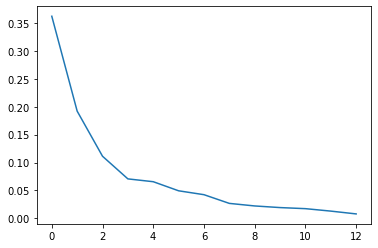

In [159]:
pc.explained_variance_
np.cumsum(pc.explained_variance_/np.sum(pc.explained_variance_))
plt.plot(pc.explained_variance_/np.sum(pc.explained_variance_))

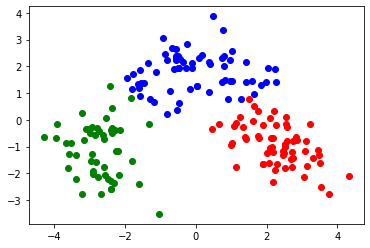

In [208]:
cp1 = pc.transform(vino2)[:, 0]
cp2 = pc.transform(vino2)[:, 1]

labels = kme.predict(vino2)
frame = pd.DataFrame({'x': cp1,'y': cp2})
frame['cluster'] = labels

color = ['blue', 'red', 'green']

for k in range(3):
    data = frame[frame["cluster"] == k]
    plt.scatter(data["x"],data["y"], c = color[k])
plt.show()

## EJERCICIO 3

El objetivo para este ejercicio es obtener el modelo más preciso para predecir la fuga de los clientes.

In [210]:
bd_clientes = pd.read_csv(link + "bank_churn.csv")
bd_clientes.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3.1 Tratamiento de datos

In [253]:
fuga = bd_clientes.loc[:, 'CreditScore':'Exited']
fuga.shape

(10000, 11)

In [255]:
split = train_test_split(fuga, train_size = 0.7, test_size = 0.3)
train = split[0]
test = split[1]

In [256]:
y_tr = train['Exited']
y_te = test['Exited']

X_tr = train[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard'
              ,'IsActiveMember','EstimatedSalary']]
X_te = test[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard'
              ,'IsActiveMember','EstimatedSalary']]

X_tr = pd.get_dummies(X_tr)
X_te = pd.get_dummies(X_te)


In [259]:
#conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_tr, y_tr = ros.fit_resample(X_tr, y_tr)

### 3.2 Ajuste de árbol de decisión 

In [273]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 4,
                                  min_samples_leaf = 50,
                                  min_samples_split = 200)
                                  
modelo_arbol = clf.fit(X_tr, y_tr)
predicciones = modelo_arbol.predict(X_te)

[Text(2640.535714285714, 4892.4, 'Age <= 41.5\nentropy = 1.0\nsamples = 11120\nvalue = [5560, 5560]\nclass = No Fuga'),
 Text(1295.357142857143, 3805.2, 'NumOfProducts <= 2.5\nentropy = 0.914\nsamples = 6279\nvalue = [4215, 2064]\nclass = No Fuga'),
 Text(797.1428571428571, 2718.0, 'NumOfProducts <= 1.5\nentropy = 0.874\nsamples = 5928\nvalue = [4186, 1742]\nclass = No Fuga'),
 Text(398.57142857142856, 1630.7999999999997, 'Geography_Germany <= 0.5\nentropy = 0.976\nsamples = 3244\nvalue = [1920, 1324]\nclass = No Fuga'),
 Text(199.28571428571428, 543.5999999999995, 'entropy = 0.923\nsamples = 2259\nvalue = [1496, 763]\nclass = No Fuga'),
 Text(597.8571428571429, 543.5999999999995, 'entropy = 0.986\nsamples = 985\nvalue = [424, 561]\nclass = Fuga'),
 Text(1195.7142857142858, 1630.7999999999997, 'Balance <= 108367.426\nentropy = 0.624\nsamples = 2684\nvalue = [2266, 418]\nclass = No Fuga'),
 Text(996.4285714285713, 543.5999999999995, 'entropy = 0.449\nsamples = 1865\nvalue = [1690, 175]\

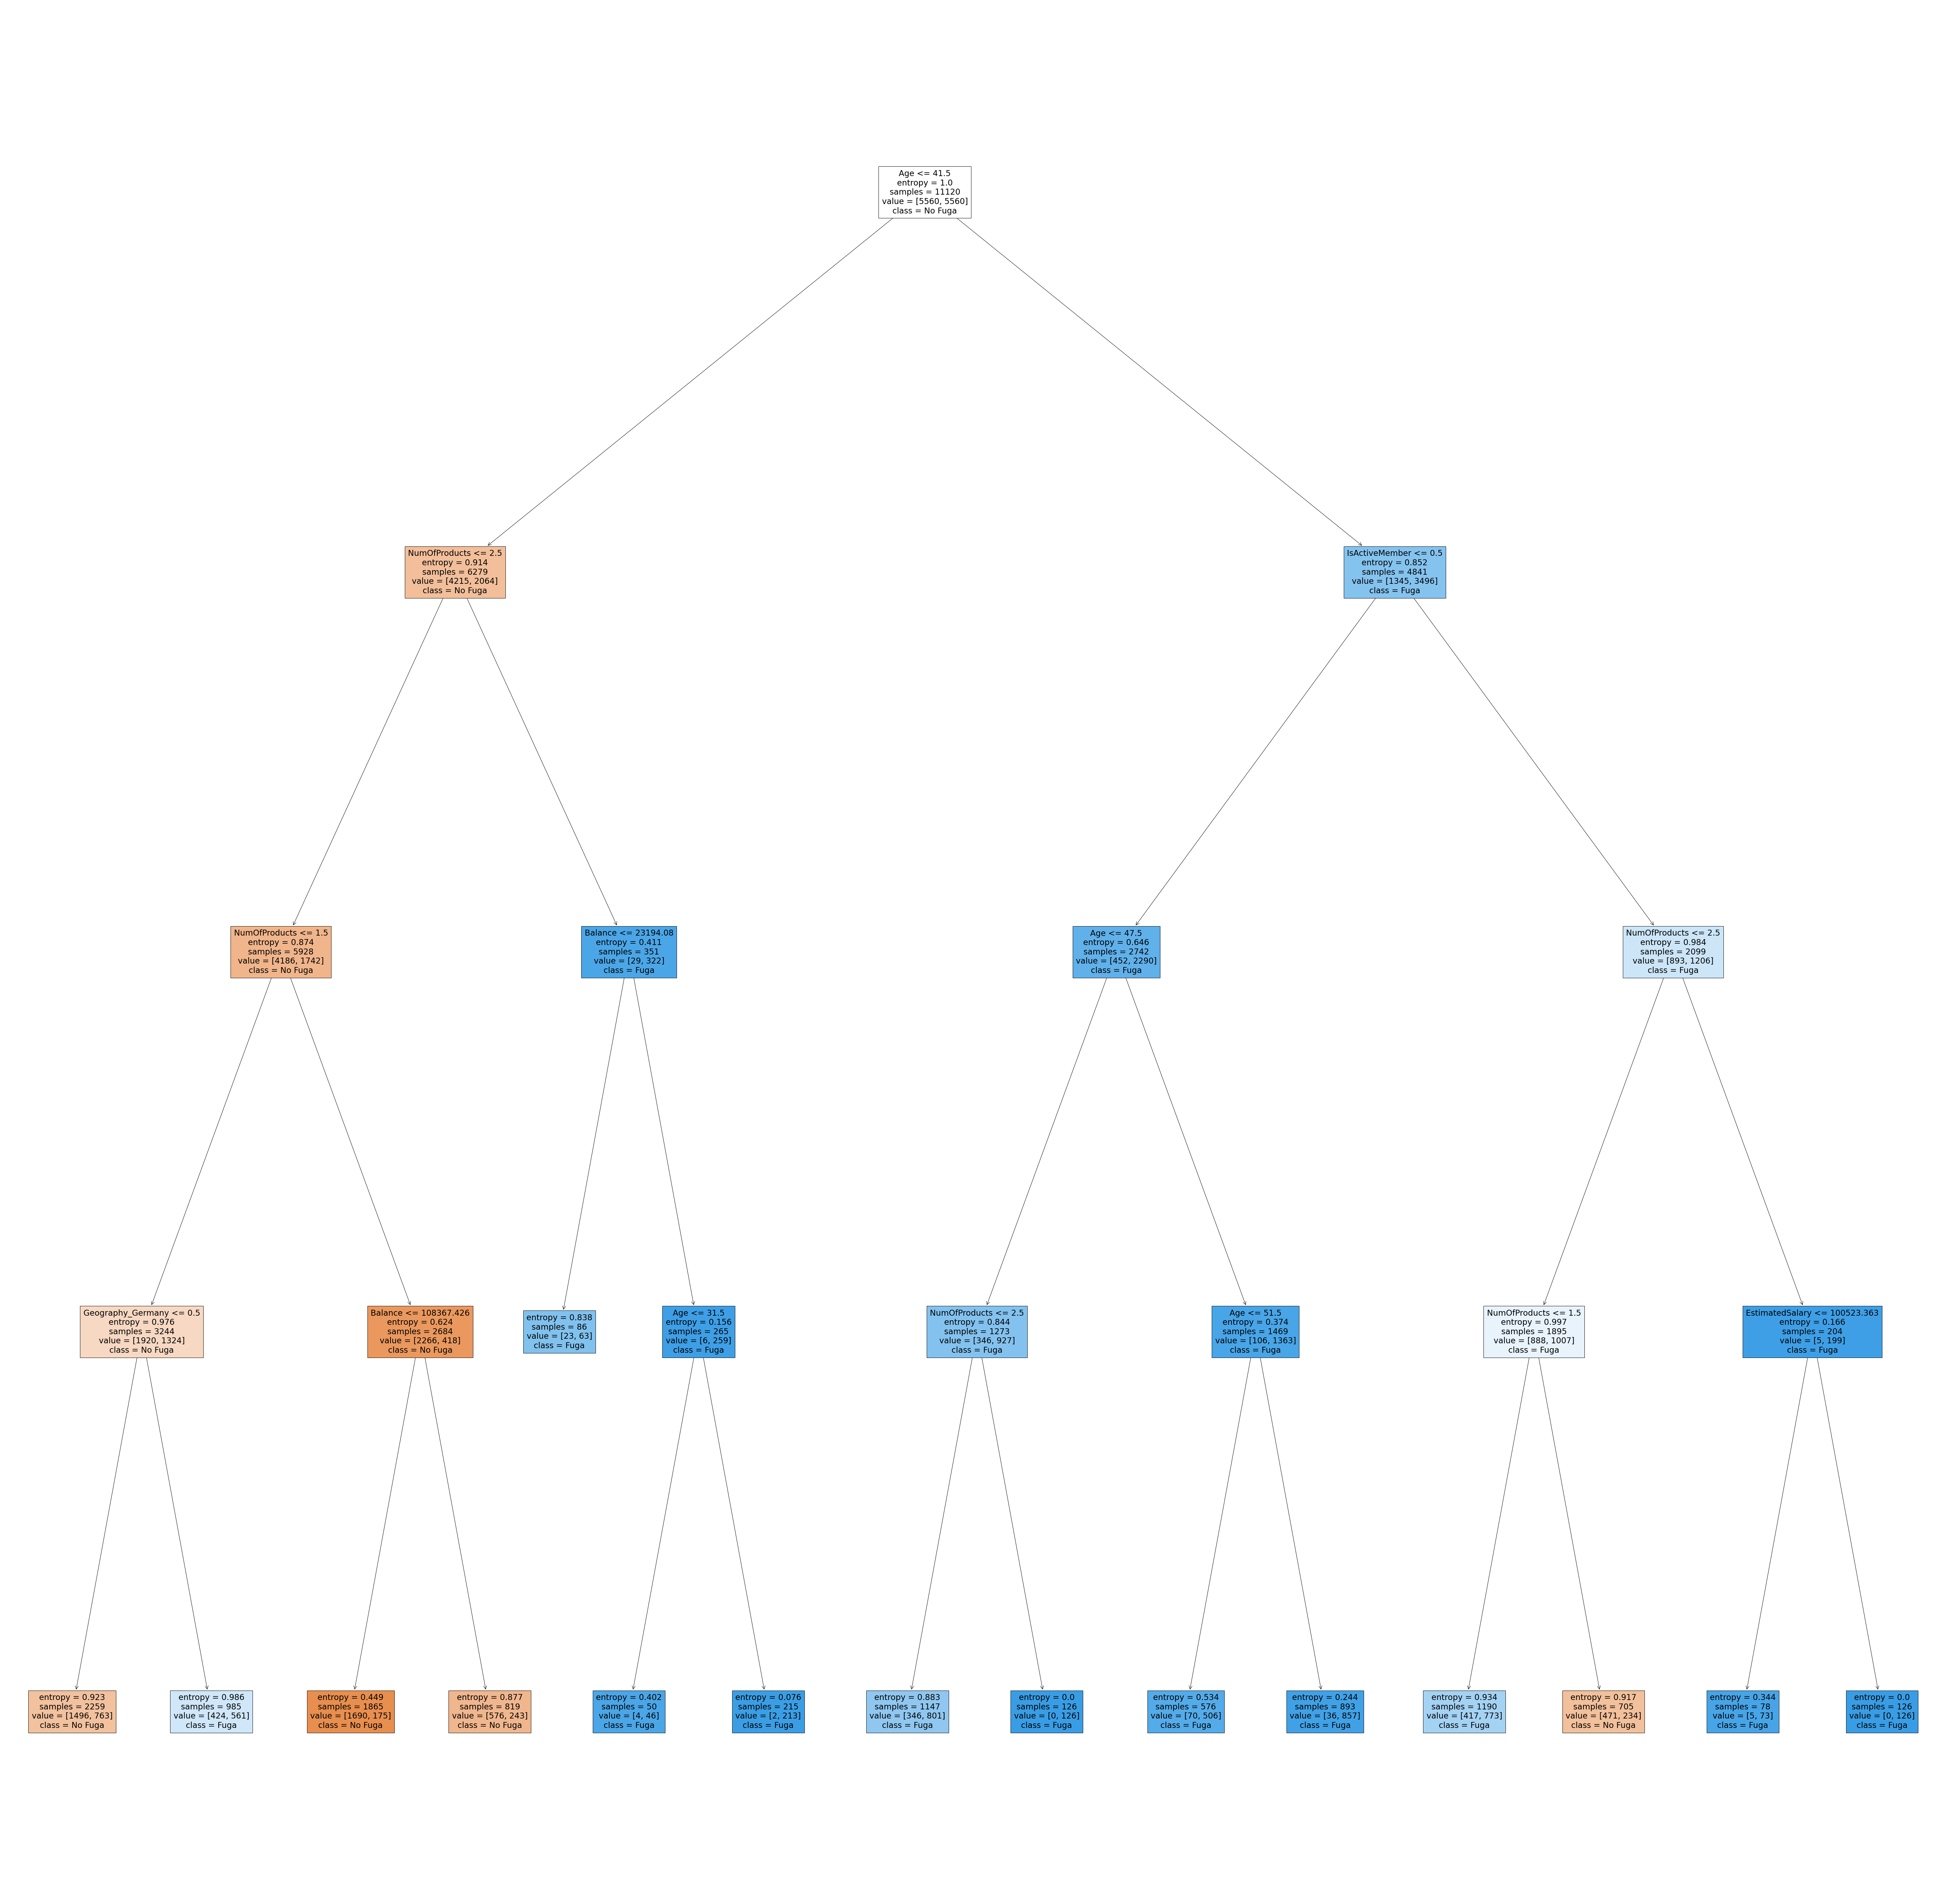

In [268]:
plt.figure(figsize=(100, 100))
tree.plot_tree(modelo_arbol, 
               feature_names = X_tr.columns,
               class_names = ['No Fuga', 'Fuga'],
              filled = True)

In [274]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_te, predicciones)

array([[1842,  561],
       [ 160,  437]], dtype=int64)

In [276]:
from sklearn.metrics import classification_report
print(classification_report(y_te, predicciones))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2403
           1       0.44      0.73      0.55       597

    accuracy                           0.76      3000
   macro avg       0.68      0.75      0.69      3000
weighted avg       0.82      0.76      0.78      3000



COMENTARIOS:

* Las variables más relevasntes segun el arbol de desición fueron: la edad, número de productos y la ubicación geografica
* El modelo tiene un accurancy de 0.76 y una mayor precisión para predecir los usuarios que No se fugan
* Menos de la mitad de las ocaciones predice bien a los clientes que se fugaron con un 0.44

### 3.3 Metodos de ensamblaje

In [291]:
# Bagging
from sklearn.ensemble import BaggingClassifier

arbol_bagg = BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'entropy'),
                            n_estimators = 100, n_jobs = 2)

In [292]:
from sklearn.model_selection import cross_validate
cv1 = cross_validate(arbol_bagg,
                    X_tr,
                    y_tr,
                    cv = 5,
                    n_jobs = 2,
                   return_train_score = True)

In [293]:
arbol_bagg.fit(X_tr, y_tr)
predicciones2 = arbol_bagg.predict(X_te)
confusion_matrix(y_te, predicciones2)

array([[2205,  198],
       [ 271,  326]], dtype=int64)

In [294]:
from sklearn import metrics
metrics.accuracy_score(y_te, predicciones2)

0.8436666666666667

In [295]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
modelo_ada = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion = 'entropy'),
                                n_estimators = 100)

In [297]:
cv2 = cross_validate(modelo_ada,
                    X_tr,
                    y_tr,
                    cv = 5,
                    n_jobs = 2,
                   return_train_score = True)

In [298]:
modelo_ada.fit(X_tr, y_tr)
predicciones3 = modelo_ada.predict(X_te)
confusion_matrix(y_te, predicciones3)

array([[2062,  341],
       [ 274,  323]], dtype=int64)

In [299]:
metrics.accuracy_score(y_te, predicciones3)

0.795

COMENTARIOS:

* El ensamblaje usando Bagging mostró mejores resultados en cuanto a Accurancy (0.84)
* Ambos metodos predicen de manera muy similar a los clientes que se fugan


### 3.4 Optimización de hiperparametros

In [302]:
# Optimizar parametros Arbol - Bagging
from sklearn.model_selection import GridSearchCV

grilla = {'n_estimators': [50,75,100,125,150]}

gsearch1 = GridSearchCV(arbol_bagg,  # modelo a evaluar
                       param_grid = grilla, # Indicar diccionario de grilla
                       cv = 5, # particiones de validación cruzada
                       n_jobs = 2) # cantidad de nucleos para paralelizar el proceso
gsearch1.fit(X_tr, y_tr)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                                         n_estimators=100, n_jobs=2),
             n_jobs=2, param_grid={'n_estimators': [50, 75, 100, 125, 150]})

In [304]:
resultados = pd.DataFrame(gsearch1.cv_results_).sort_values(['rank_test_score'])
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,2.080640,0.008513,0.038041,0.002033,100,{'n_estimators': 100},0.934353,0.940647,0.943795,0.943795,0.952338,0.942986,0.005810,1
4,4.681064,0.377292,0.087810,0.020112,150,{'n_estimators': 150},0.934353,0.943345,0.943345,0.943795,0.948291,0.942626,0.004538,2
0,1.055262,0.040409,0.024503,0.004200,50,{'n_estimators': 50},0.934802,0.938849,0.940647,0.946493,0.951888,0.942536,0.006002,3
1,1.679121,0.085954,0.030104,0.002619,75,{'n_estimators': 75},0.932554,0.940198,0.939748,0.946942,0.947842,0.941457,0.005561,4
3,2.724376,0.164227,0.053921,0.008018,125,{'n_estimators': 125},0.933903,0.933903,0.938399,0.944245,0.948291,0.939748,0.005716,5


COMENTARIO: El mejor hiperparametro encontrado fue de 100 estimadores

In [305]:
# Optimizar parametros Arbol - Adaboost
gsearch2 = GridSearchCV(modelo_ada,  # modelo a evaluar
                       param_grid = grilla, # Indicar diccionario de grilla
                       cv = 5, # particiones de validación cruzada
                       n_jobs = 2) # cantidad de nucleos para paralelizar el proceso
gsearch2.fit(X_tr, y_tr)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                                          n_estimators=100),
             n_jobs=2, param_grid={'n_estimators': [50, 75, 100, 125, 150]})

In [306]:
resultados2 = pd.DataFrame(gsearch2.cv_results_).sort_values(['rank_test_score'])
resultados2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.048080,0.002759,0.002222,0.002352,150,{'n_estimators': 150},0.909622,0.919065,0.923112,0.921313,0.924011,0.919424,0.005185,1
1,0.061774,0.006631,0.003539,0.004248,75,{'n_estimators': 75},0.910072,0.919065,0.919514,0.919964,0.924460,0.918615,0.004690,2
3,0.049372,0.000937,0.001680,0.001425,125,{'n_estimators': 125},0.909173,0.919964,0.915018,0.920414,0.924460,0.917806,0.005254,3
0,0.050897,0.002035,0.003505,0.003004,50,{'n_estimators': 50},0.908273,0.921313,0.918615,0.916367,0.923561,0.917626,0.005270,4
2,0.052219,0.004731,0.001908,0.003106,100,{'n_estimators': 100},0.907374,0.919964,0.915018,0.921313,0.919065,0.916547,0.005044,5


COMENTARIOS: El mejor hiperparametro para el metodo de ensamblaje adaboost fue de 150 estimadores

### 3.5 Ajuste ligthGBM

In [310]:
# pip install lightgbm
from lightgbm import LGBMClassifier

In [311]:
grilla_LGBM = {'n_estimators': [80, 100, 120, 140],
         'learning_rate': [0.3, 0.4, 0.5, 0.6],
         'max_depth': [6, 7, 8, 9]}

gsearch = GridSearchCV(LGBMClassifier(), 
                       param_grid = grilla_LGBM, 
                       cv = 5, 
                       n_jobs = 4)
gsearch.fit(X_tr, y_tr)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.3, 0.4, 0.5, 0.6],
                         'max_depth': [6, 7, 8, 9],
                         'n_estimators': [80, 100, 120, 140]})

In [313]:
resultados_LGBM = pd.DataFrame(gsearch.cv_results_).sort_values(['rank_test_score'])
resultados_LGBM.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
47,0.415409,0.012899,0.034079,0.003951,0.5,9,140,"{'learning_rate': 0.5, 'max_depth': 9, 'n_esti...",0.925360,0.937050,0.944694,0.946043,0.949191,0.940468,0.008544,1
55,0.378627,0.010481,0.033450,0.002808,0.6,7,140,"{'learning_rate': 0.6, 'max_depth': 7, 'n_esti...",0.925360,0.943795,0.939748,0.944694,0.945594,0.939838,0.007510,2
31,0.311035,0.013376,0.025857,0.003198,0.4,9,140,"{'learning_rate': 0.4, 'max_depth': 9, 'n_esti...",0.931655,0.935252,0.943345,0.947392,0.938399,0.939209,0.005612,3
63,0.364460,0.034505,0.031534,0.006367,0.6,9,140,"{'learning_rate': 0.6, 'max_depth': 9, 'n_esti...",0.928507,0.936601,0.937500,0.945594,0.947842,0.939209,0.006922,3
54,0.329384,0.014275,0.029781,0.001333,0.6,7,120,"{'learning_rate': 0.6, 'max_depth': 7, 'n_esti...",0.924460,0.940198,0.942896,0.939748,0.948291,0.939119,0.007935,5


In [315]:
lgbm_c = LGBMClassifier(learning_rate = 0.5, # Tasa de aprendizaje
                        max_depth = 9, # Podado del árbol
                        n_estimators = 140, # Número de iteraciones
                        n_jobs = 1, # Número de jobs en paralelo
                        reg_alpha = 0.0, # Regularización L1
                        reg_lambda = 0.0, # Regularización L2
                        num_leaves = 500,
                        random_state = 123,
                        silent = True) # Evitar mucho output

In [316]:
modelo_A = lgbm_c.fit(X_tr, y_tr)
preds_A = modelo_A.predict(X_te)
probs_A_churn = modelo_A.predict_proba(X_te)[:, 1]
probs_A_churn_tr = modelo_A.predict_proba(X_tr)[:, 1]

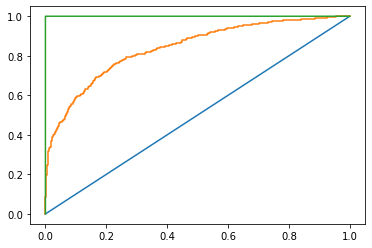

In [317]:
roc = metrics.roc_curve(y_te, probs_A_churn)
roc_tr = metrics.roc_curve(y_tr, probs_A_churn_tr)
plt.plot([0,1], [0,1])
plt.plot(roc[0], roc[1])
plt.plot(roc_tr[0], roc_tr[1])